# Midterm Question 2 Analysis 2

In [1]:
import requests                                # Lib to work on http request and respponse
import json                                    # Lib to handle json files
import glob                                    # Lib to handle folders and its content
from bs4 import BeautifulSoup as BS
import csv                                     # Lib to work with CSV files
from dateutil.parser import parse              # Lib to parse date and convert as per requirnment
import datetime
import matplotlib.pyplot as plt                # Lib to plot a graph

In [ ]:
#Code to fetch data from Artical Search , Artical Archieved and Most Popular APT
nyt_api = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'
#auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
auth_key = '7a3f07017a9f40c6b9de8bca324f455b'
q='technology'
begin_date = '19900101'               #change date to 20000101 
end_date = '19991231'                 #Change date to 20151231
date = 'begin_date=' + begin_date + '&' + 'end_date=' + end_date + '&'
page = 0                              #Maximum limit for pagination
pages=120

for i in range(0, pages):              # For loop to generated multiple pages
    page = i
    #url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+date+'page='+str(page)
    url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+'page='+str(page)
    response = requests.get(url)
    json.dump(response.json(), open("midterm/data/technology"+str(page)+".json",'w'))

#Most Popular API data fetching
auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
nyt_api = 'https://api.nytimes.com/svc/mostpopular/v2/mostviewed/technology/30.json'
url=nyt_api+'?'+'apikey='+ auth_key
response = requests.get(url)
json.dump(response.json(), open("midterm/data/technologyM.json",'w'))

In [114]:
tech_file_list = glob.glob('midterm\\data\\technology\\*.json')     #location where technology related articals are saved
tech_details = []
#print(tech_file_list)

for t in tech_file_list:                                            # Looping through each json file and getting required content
    #print("processing "+t)
    with open(t) as json_file:
        data=json.load(json_file)
        temp = len(data["response"]['docs'])
        for i in range(temp):
            ID = data["response"]['docs'][i]['_id']
            lead_paragraph = data["response"]['docs'][i]['lead_paragraph']
            section_name = data["response"]['docs'][i]['section_name']
            word_count =  data["response"]['docs'][i]['word_count']
            pub_date = parse(data["response"]['docs'][i]['pub_date'])
            myDate =(pub_date.strftime('%Y/%m/%d'))
            tech_details.append([ID,lead_paragraph,section_name,word_count,myDate])

file = open('midterm\\data\\output\\technologyDetails.csv','w',newline='',encoding='utf-8')   # code to write list into CSV
writer =csv.writer(file)
writer.writerow(["ID","lead_paragraph","section_name","word_count","myDate"])
for x in tech_details:
    writer.writerow(x)

In [116]:
para_details =[]                               # Appending snippet field of each artical into list
for t in tech_details:
    #category = t[2]
    para = t[1]
    para_details.append(para)
#print(para_details)
#print(para_details)
#print(len(para_details))
            

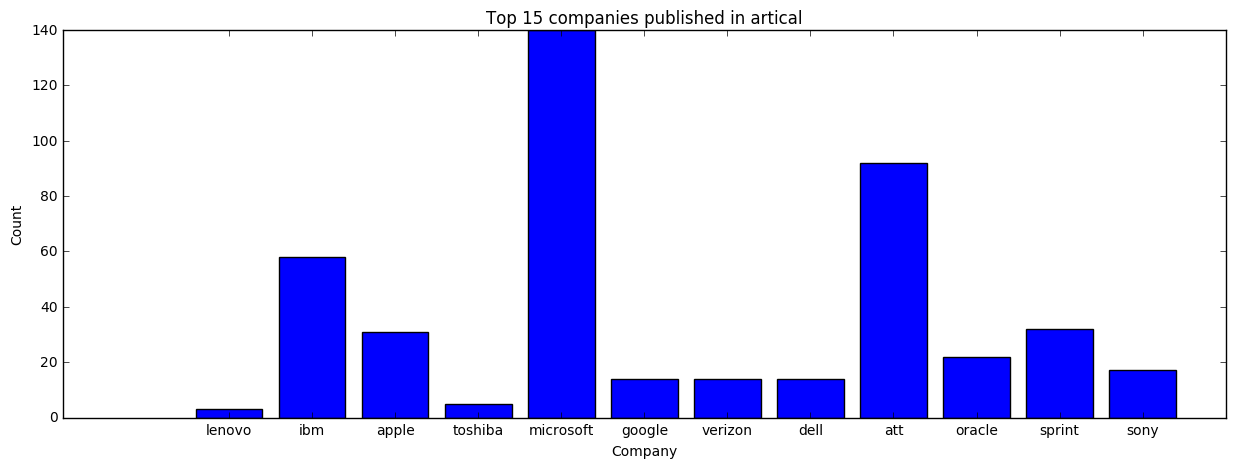

In [117]:
word_list =[]                                       # Word list for all snippet from articals
word_list_clean =[]                                 # Clean words from artical title 
word_frequency = {}
graph_freq ={}

for a in para_details:                             
    myline = str(a)
    templist =myline.split(" ")
    for t in templist:
        word_list.append(t.lower())
#print(word_list)

for e in word_list:                                                # Removing unwated punctuations
    s = str(e)
    s = re.sub(r'[^\w\s]','',s)
    word_list_clean.append(s)
#print(word_list_clean)

for w in word_list_clean:                                         # Counting unique words and storing count in dic.
    if w not in word_frequency:
        word_frequency[w]=1
    else:
        word_frequency[w]=word_frequency[w]+1
#print(word_frequency)

company_list = ['ibm','microsoft','apple','verizon','google','sprint','att','dell','lenovo','sony','oracle','toshiba','sprint','fujistu']

# this list is manually created based on word count and fortune 500 IT companies

for x,y in word_frequency.items():   # Dictionary for storing graph related data
    matchword =x
    for c in company_list:
        if re.match(c, matchword):
            if c not in graph_freq:
                graph_freq[c]=y
            else:
                graph_freq[c]=graph_freq[c]+y
#print(graph_freq)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
plt.xlabel("Company")
plt.ylabel("Count")
plt.title('Top 15 companies published in artical')
plt.bar(range(len(graph_freq)), graph_freq.values(), align='center')
plt.xticks(range(len(graph_freq)), list(graph_freq.keys()),rotation='horizontal')
plt.show()